In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv("glass.csv")

In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df["Type"].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [ ]:
def check_data(df):
    assert isinstance(df, pd.DataFrame)
    sparse = []
    null = []
    for col in df.columns:
        if pd.api.types.is_sparse(df[col])==True:
            sparse.append(col)
        if df[col].isnull().sum()>0:
            null.append(col)
    if df.duplicated().sum()>0:
        df.drop_duplicates(inplace = True)
    return (sparse==[]) or (null==[]) or (df.duplicated().sum()==0)

In [ ]:
check_data(df)

True

In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


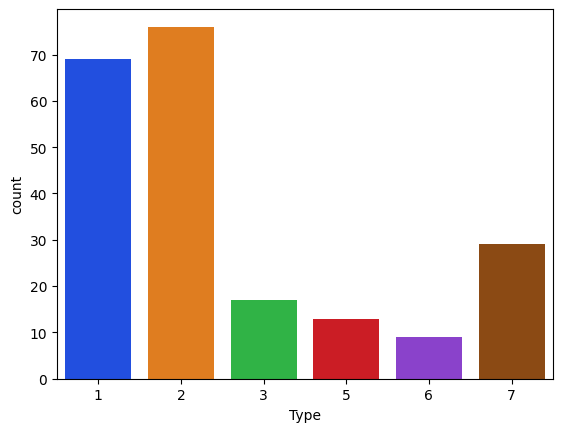

In [ ]:
sns.countplot(x="Type", data=df, palette="bright");

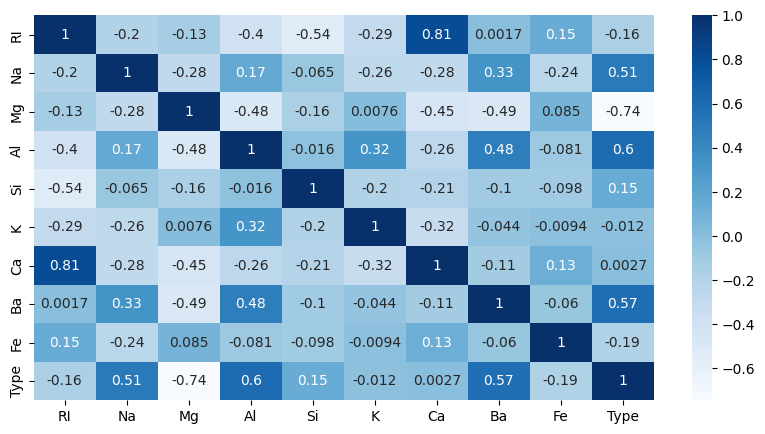

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues');

In [ ]:
def preprocessing(df):
    X,y = df.drop("Type", axis =1), df[["Type"]]
    ss = StandardScaler()
    cols = X.columns
    l = ss.fit_transform(X)
    X = pd.DataFrame(l, columns = cols)
    sm = SMOTE(random_state=42)
    X, y = sm.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X,y, X_train, X_test, y_train, y_test

In [ ]:
X,y, X_train, X_test, y_train, y_test = preprocessing(df)

In [ ]:
df.shape

(213, 10)

In [ ]:
def modeling(X_train, X_test, y_train, y_test):
    results = {}
    model_lr = LogisticRegression()
    model_lr.fit(X_train, y_train)
    score_lr = model_lr.score(X_test, y_test)
    y_pred_lr = model_lr.predict(X_test)
    results["lr_score"] =score_lr
    results["y_pred_lr"] =y_pred_lr
    
    #SVC
    model_svc = SVC()
    model_svc.fit(X_train, y_train)
    score_svc = model_svc.score(X_test, y_test)
    y_pred_svc = model_svc.predict(X_test)

    results["score_svc"] =score_svc
    results["y_pred_svc"] =y_pred_svc

    # Decision Trees
    model_dt = DecisionTreeClassifier()
    model_dt.fit(X_train, y_train)
    score_dt = model_dt.score(X_test, y_test)
    y_pred_dt = model_dt.predict(X_test)
    
    results["score_dt"] =score_dt
    results["y_pred_dt"] =y_pred_dt
    
    return results

In [ ]:
results = modeling(X_train, X_test, y_train, y_test)

In [ ]:
results

{'lr_score': 0.8152173913043478,
 'y_pred_lr': array([6, 1, 5, 1, 3, 7, 5, 1, 6, 1, 2, 5, 1, 6, 6, 3, 5, 5, 7, 3, 3, 3,
        3, 3, 3, 7, 5, 7, 1, 3, 6, 3, 7, 1, 7, 3, 5, 5, 2, 2, 6, 3, 7, 2,
        3, 3, 3, 3, 7, 5, 3, 1, 1, 5, 6, 7, 1, 6, 1, 7, 5, 1, 2, 7, 5, 1,
        7, 6, 5, 7, 5, 6, 1, 6, 7, 7, 1, 6, 7, 3, 6, 5, 6, 1, 1, 7, 7, 1,
        2, 1, 3, 1], dtype=int64),
 'score_svc': 0.8804347826086957,
 'y_pred_svc': array([6, 1, 5, 1, 3, 7, 5, 1, 6, 1, 2, 5, 1, 6, 6, 2, 5, 5, 7, 2, 3, 3,
        3, 2, 3, 7, 2, 7, 1, 3, 6, 3, 7, 1, 7, 2, 5, 5, 2, 2, 6, 2, 7, 2,
        3, 3, 3, 3, 7, 5, 3, 1, 3, 5, 6, 7, 1, 6, 1, 7, 5, 1, 2, 7, 5, 1,
        7, 6, 5, 7, 5, 6, 1, 6, 7, 7, 1, 6, 7, 3, 6, 5, 6, 1, 1, 7, 7, 2,
        2, 1, 3, 3], dtype=int64),
 'score_dt': 0.9021739130434783,
 'y_pred_dt': array([6, 1, 5, 1, 3, 7, 5, 1, 6, 1, 2, 5, 1, 6, 6, 1, 5, 5, 7, 2, 2, 2,
        3, 2, 3, 7, 2, 7, 1, 3, 6, 3, 7, 2, 7, 2, 5, 5, 1, 1, 6, 2, 7, 2,
        3, 2, 3, 3, 7, 5, 3, 1, 1, 5, 6, 7, 1, 6, 

In [ ]:
print(results["lr_score"])
print(results["score_svc"])
print(results["score_dt"])

0.8152173913043478
0.8804347826086957
0.9021739130434783


In [ ]:
f1_score_lr= f1_score(y_test, results['y_pred_lr'], average="macro")
precision_score_lr = precision_score(results['y_pred_lr'], y_test, average="macro")
accuracy_score_lr = accuracy_score(results['y_pred_lr'], y_test)
recall_score_lr = recall_score(results['y_pred_lr'], y_test, average="macro")


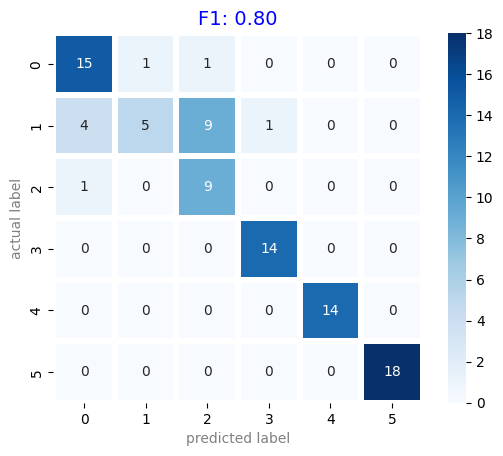

In [ ]:
cm_lr = confusion_matrix(y_test, results['y_pred_lr'])
sns.heatmap(
    cm_lr,
    annot=True,
    fmt=".0f",
    linewidths=3,
    square=True,
    cmap="Blues",
    color="#cd1076",
)
plt.ylabel("actual label", color="grey")
plt.xlabel("predicted label", color="grey")
plt.title(f"F1: {f1_score_lr:.2f}", size=14, color="blue")
plt.show()

In [ ]:
results['lr_score']

In [ ]:
f1_score_svc= f1_score(y_test, results['y_pred_svc'], average="macro")
precision_score_svc = precision_score(results['y_pred_svc'], y_test, average="macro")
accuracy_score_svc= accuracy_score(results['y_pred_svc'], y_test)
recall_score_svc = recall_score(results['y_pred_svc'], y_test, average="macro")

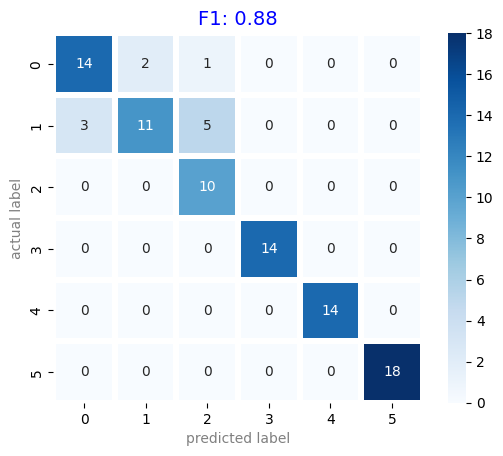

In [ ]:
cm_svc = confusion_matrix(y_test, results['y_pred_svc'])
sns.heatmap(
    cm_svc,
    annot=True,
    fmt=".0f",
    linewidths=3,
    square=True,
    cmap="Blues",
    color="#cd1076",
)
plt.ylabel("actual label", color="grey")
plt.xlabel("predicted label", color="grey")
plt.title(f"F1: {f1_score_svc:.2f}", size=14, color="blue")
plt.show()

In [ ]:
f1_score_dt= f1_score(y_test, results['y_pred_dt'], average="macro")
precision_score_dt = precision_score(results['y_pred_dt'], y_test, average="macro")
accuracy_score_dt= accuracy_score(results['y_pred_dt'], y_test)
recall_score_dt = recall_score(results['y_pred_dt'], y_test, average="macro")

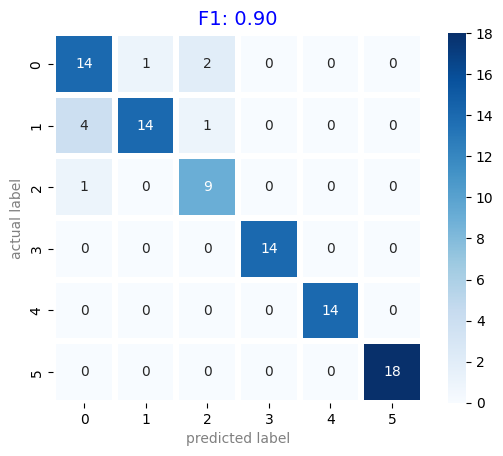

In [ ]:
cm_dt = confusion_matrix(y_test, results['y_pred_dt'])
sns.heatmap(
    cm_dt,
    annot=True,
    fmt=".0f",
    linewidths=3,
    square=True,
    cmap="Blues",
    color="#cd1076",
)
plt.ylabel("actual label", color="grey")
plt.xlabel("predicted label", color="grey")
plt.title(f"F1: {f1_score_dt:.2f}", size=14, color="blue")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[14,  1,  2,  0,  0,  0],
       [ 2, 17,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0, 18]], dtype=int64)

In [ ]:
rf.score(X_test, y_test)

0.9456521739130435

In [ ]:
precision_score(y_test, y_pred, average='macro')

0.9421296296296297

In [ ]:
f1_score(y_test, y_pred, average='macro')

0.9460824460824462

In [ ]:
X, y = df.drop("Type", axis=1), df[["Type"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_test, y_test)

0.7441860465116279

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
precision_score(y_test, y_pred, average='macro')

0.7268518518518517

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 9,  1,  0,  0,  0,  0],
       [ 3, 11,  0,  1,  0,  0],
       [ 0,  1,  2,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  2,  0],
       [ 0,  1,  0,  0,  0,  8]], dtype=int64)